In [ ]:
# import Libraries

import torch

import torch.nn as nn

%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

# check out the first few Lines of data
iris.head()

#The Iris dataset contains 3 different species of irises: 
#Setosa, Versicolour, and Virginica. Each species is represented by 50 samples, 
#for a total of 150 samples in the dataset.```

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


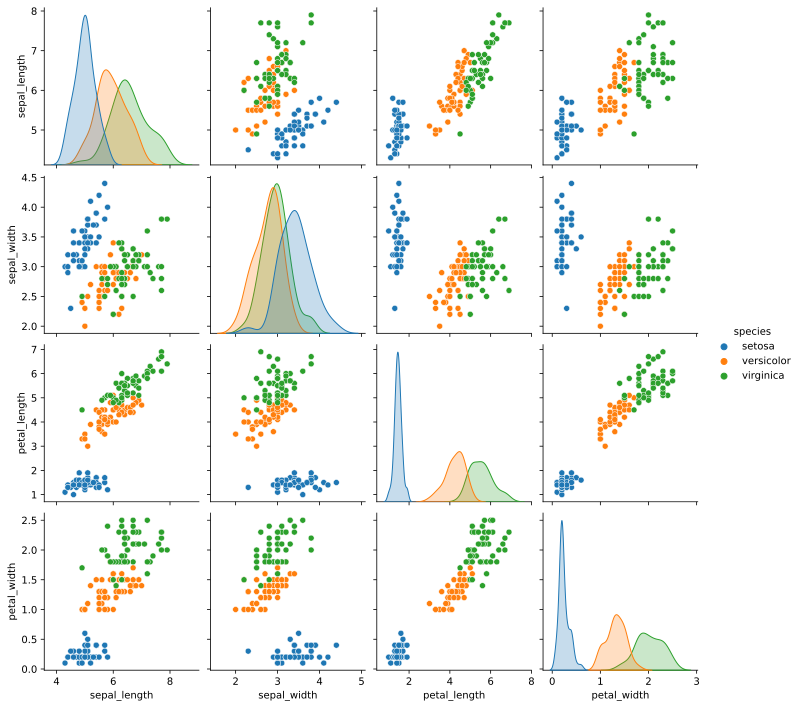

In [ ]:
sns.pairplot(iris, hue='species')
plt.show()

In [ ]:
# Convert the iris features to a PyTorch float tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# Create a PyTorch long tensor for the labels
labels = torch.zeros(len(data), dtype=torch.long)

# Set label value 1 for iris species 'versicolor'
labels[iris.species == 'versicolor'] = 1

# Set label value 2 for iris species 'virginica'
labels[iris.species == 'virginica'] = 2


In [ ]:
ANNiris = nn.Sequential(
nn.Linear(4,64), # input Layer
nn.ReLU(), # activation
nn.Linear(64,64), # hidden Layer
nn.ReLU(), # activation
nn.Linear(64,3), # output Layer
)
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

In [ ]:
numepochs = 1000

# Initialize a tensor to store the losses over epochs
losses = torch.zeros(numepochs)

# Initialize an empty list to store the ongoing accuracy over epochs
ongoingAcc = []

# Loop over epochs
for epochi in range(numepochs):

    # Get the predictions of the model for the current epoch
    yHat = ANNiris(data)
    
    # Calculate the loss between the predicted labels and true labels
    loss = lossfun(yHat, labels)
    
    # Store the loss for this epoch in the losses tensor
    losses[epochi] = loss
    
    # Zero the gradients in the optimizer
    optimizer.zero_grad()
    
    # Compute gradients and backpropagate the loss
    loss.backward()
    
    # Update the model's parameters based on the gradients computed above
    optimizer.step()
    
    # Calculate accuracy for this epoch and add it to the list ongoingAcc
    matches = torch.argmax(yHat,axis=1) == labels 
    matchesNumeric = matches.float() 
    accuracyPct = 100*torch.mean(matchesNumeric) 
    ongoingAcc.append(accuracyPct)

# Get the final predictions of the model after training
predictions = ANNiris(data)
    
# Convert the predictions tensor to class labels
predlabels = torch.argmax(predictions, axis=1)

# Calculate the accuracy of the model by comparing the predicted and true labels
totalacc = 100*torch.mean((predlabels == labels).float())

# Get the index of the maximum value in yHat along axis 1
# This will give us the predicted class for each input in the data
torch.argmax(yHat, axis=1)


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

Final accuracy: 98%


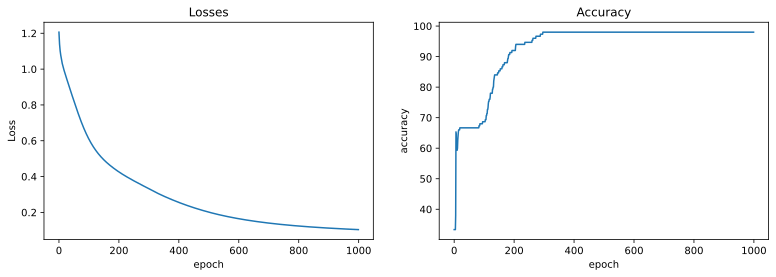

In [ ]:
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1]. plot (ongoingAcc)

ax[1].set_ylabel('accuracy')

ax[1].set_xlabel('epoch')

ax[1].set_title( 'Accuracy' )

plt.show()


In [ ]:
sm = nn.Softmax(1)
torch. sum(sm(yHat) ,axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

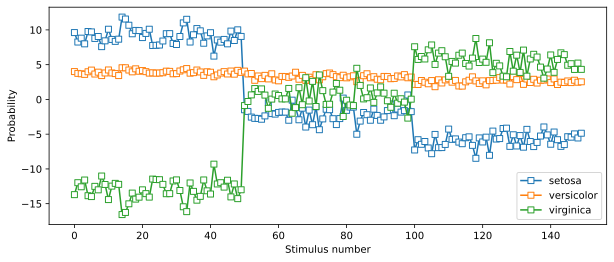

In [ ]:
# plot the raw model outputs
fig = plt.figure(figsize=(10,4))
plt.plot(yHat.detach(), 's-',markerfacecolor='w' )
plt.xlabel( 'Stimulus number')

plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica' ])
plt.show()